In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from pandas import DataFrame, Series
from matplotlib.patches import Rectangle
from atus_analysis import importer, draw_plot_one, draw_plot_two
%matplotlib inline

In [2]:
df = importer(None)

In [3]:
test = df[['TRTCCTOT', 'TRTO']]

In [4]:
test.corr()

,TRTCCTOT,TRTO
TRTCCTOT,1.000000,0.926599
TRTO,0.926599,1.000000


In [5]:
# df['t010101'].head(10)
# CaringHH = df[['t030101', 't030102', 't030103', 't030104', 't030105', 't030106', 't030108', 't030109', 't030110', 't030111', 't030112', 't030199', 't030201', 't030202', 't030203', 't030299', 't030301', 't030302', 't030303', 't030399', 't030401', 't030402', 't030403', 't030404', 't030405', 't030499', 't030501', 't030502', 't030503', 't030504', 't030599', 't039999']]
# CaringHH.sum(axis=1).head(5)
# df['TRTHH'].head(5)
# df['TELFS'].head(5)

In [6]:
test2 = df[['TEAGE', 'TRDTOCC1']]
df['TEAGE'].groupby(df['TRDTOCC1']).mean()

TRDTOCC1
-1     56.144924
 1     46.828471
 2     45.716080
 3     41.173729
 4     42.530612
 5     43.395062
 6     44.250000
 7     45.205882
 8     43.866920
 9     45.866242
 10    42.570388
 11    41.906250
 12    42.313953
 13    35.700000
 14    47.228571
 15    41.222222
 16    42.674809
 17    45.038929
 18    40.615385
 19    41.607383
 20    43.796209
 21    46.025714
 22    44.824289
Name: TEAGE, dtype: float64

In [7]:
list(df.columns)

['TUCASEID',
 'TUFINLWGT_x',
 'TRYHHCHILD_x',
 'TEAGE',
 'TESEX',
 'PEEDUCA',
 'PTDTRACE',
 'PEHSPNON',
 'GTMETSTA',
 'TELFS_x',
 'TEMJOT_x',
 'TRDPFTPT_x',
 'TESCHENR_x',
 'TESCHLVL_x',
 'TRSPPRES_x',
 'TESPEMPNOT_x',
 'TRERNWA_x',
 'TRCHILDNUM_x',
 'TRSPFTPT_x',
 'TEHRUSLT_x',
 'TUDIARYDAY_x',
 'TRHOLIDAY_x',
 'TRTEC_x',
 'TRTHH_x',
 't010101',
 't010102',
 't010201',
 't010299',
 't010301',
 't010399',
 't010401',
 't010501',
 't019999',
 't020101',
 't020102',
 't020103',
 't020104',
 't020199',
 't020201',
 't020202',
 't020203',
 't020301',
 't020302',
 't020303',
 't020399',
 't020401',
 't020402',
 't020499',
 't020501',
 't020502',
 't020599',
 't020601',
 't020602',
 't020699',
 't020701',
 't020799',
 't020801',
 't020901',
 't020902',
 't020903',
 't020904',
 't020905',
 't020999',
 't029999',
 't030101',
 't030102',
 't030103',
 't030104',
 't030105',
 't030106',
 't030108',
 't030109',
 't030110',
 't030111',
 't030112',
 't030199',
 't030201',
 't030202',
 't030203',
 't

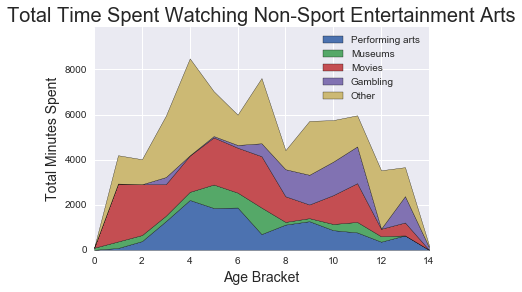

In [8]:
bins = np.array([0,15,20,25,30,35,40,45,50,55,60,65,70,75,80,100])
groups = df[['t120401', 't120402', 't120403', 't120404', 't120499']].groupby(pd.cut(df['TEAGE'], bins))
output = groups.sum().dropna()

label_list = ['Performing arts', 'Museums', 'Movies', 'Gambling', 'Other']
x = np.arange(15)
y1, y2, y3, y4, y5 = output['t120401'], output['t120402'], output['t120403'], output['t120404'], output['t120499']

fig,ax = plt.subplots()
stck = ax.stackplot(x, y1, y2, y3, y4, y5)
ax.set_ylim([0,9900])
proxy_rects = [Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in stck]
ax.legend(proxy_rects, label_list)
plt.title('Total Time Spent Watching Non-Sport Entertainment Arts', fontsize=20)
plt.ylabel('Total Minutes Spent', fontsize=14)
plt.xlabel('Age Bracket', fontsize=14)
plt.draw()
plt.show()

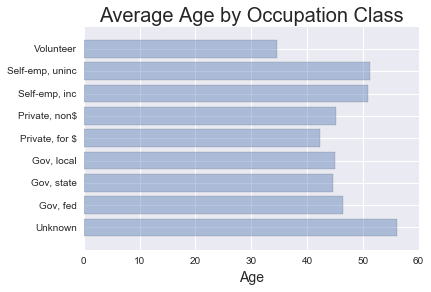

In [9]:
draw_plot_two()

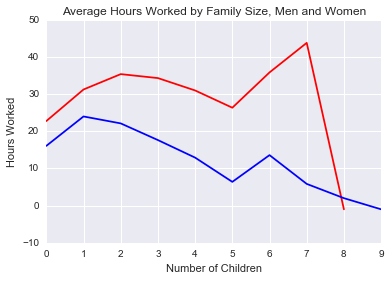

In [10]:
tempM = df.loc[df['TESEX'] == 1, ['TRCHILDNUM_y', 'TEHRUSLT_y']]
tempF = df.loc[df['TESEX'] == 2, ['TRCHILDNUM_y', 'TEHRUSLT_y']]

line1 = tempM['TEHRUSLT_y'].groupby(df['TRCHILDNUM_y']).mean()
line2 = tempF['TEHRUSLT_y'].groupby(df['TRCHILDNUM_y']).mean()

plt.plot(line1, color='r')
plt.plot(line2, color='b')
plt.title('Average Hours Worked by Family Size, Men and Women')
plt.ylabel('Hours Worked')
plt.xlabel('Number of Children')
plt.show()

In [11]:
temp = pd.cut(df['TEAGE'], 5)
a = list(df[['t120401', 't120402', 't120403', 't120404', 't120499']].groupby(temp))
y = np.array(a)
x = np.arange(10)

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3)
plt.show()

ValueError: setting an array element with a sequence